In [1]:
# Groundtruth file

# Notebook used to generate the ground truth according to the position of prisms in post-process.

In [1]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [14]:
ttfu = importlib.reload(ttfu)
path = "./data/prediction/TS/20220523/"
prefix = "nr_trimble"
P1 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3 = np.array(ttfu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

IndexError: list index out of range

In [2]:
ttfu = importlib.reload(ttfu)
path = "./data/prediction/TS/20220523_other/"
prefix = "nr_trimble"
P1 = np.array(ttfu.read_prediction_data_resection_csv_file(path+prefix +"_1.csv"))
P2 = np.array(ttfu.read_prediction_data_resection_csv_file(path+prefix +"_2.csv"))
P3 = np.array(ttfu.read_prediction_data_resection_csv_file(path+prefix +"_3.csv"))

In [3]:
P = np.array([[-0.38468404, -0.03935277,  0.38121922,  1.],
            [-0.64279424, -0.09226772,  0.10023607,  1.],
            [-0.63500022,  0.16525106,  0.07778268,  1.]]).T

In [4]:
# Doing a minimization between these not moving points, and the 3D prism coordinates
# Pose_lidar is a list of each rigid transform founded
list_lidar_time = []
Pose_lidar = []
Prism_corrected = []
number = len(P1)
for i in range(0,number):
    Q = np.array([P1[i,1:4], P2[i,1:4], P3[i,1:4]]).T
    Q =np.concatenate((Q, np.array([[1,1,1]])), axis=0)
    T = ttfu.point_to_point_minimization(P, Q)
    Pose_lidar.append(T)
    prism_correct = T@P
    Prism_corrected.append(prism_correct)
    list_lidar_time.append(P1[i,0])

In [5]:
Pose_lidar_arr = np.array(Pose_lidar)
Prism_corrected_arr = np.array(Prism_corrected)
print(Pose_lidar_arr[:,0,3])
print(Prism_corrected[0][:,0])

[ 0.88071992  0.88073541  0.88079636  0.88089417  0.88101669  0.88115615
  0.88131056  0.88147945  0.88165319  0.88181443  0.88195175  0.88206036
  0.88213417  0.88216512  0.88214773  0.88208386  0.88198906  0.88188957
  0.88180749  0.8817579   0.88174461  0.88174888  0.88173699  0.88167306
  0.8815383   0.88131576  0.88095962  0.88038014  0.87941805  0.87804523
  0.87663661  0.87613297  0.87790564  0.88364717  0.89608288  0.9183149
  0.9527226   1.00133526  1.06410939  1.13760277  1.21637197  1.29506404
  1.37059142  1.44257101  1.51197199  1.58004393  1.64746101  1.7142547
  1.78039913  1.84608335  1.91172506  1.97772204  2.04413962  2.11076106
  2.177393    2.24402035  2.31068533  2.3774206   2.44433429  2.51155334
  2.57909196  2.64686442  2.71478705  2.78278047  2.85066039  2.9181299
  2.98491529  3.05097926  3.11657692  3.18196888  3.24720684  3.31219185
  3.37675855  3.440937    3.50529531  3.57069797  3.63762491  3.70587109
  3.77481796  3.84388272  3.91276861  3.98147185  4.05

<IPython.core.display.Javascript object>


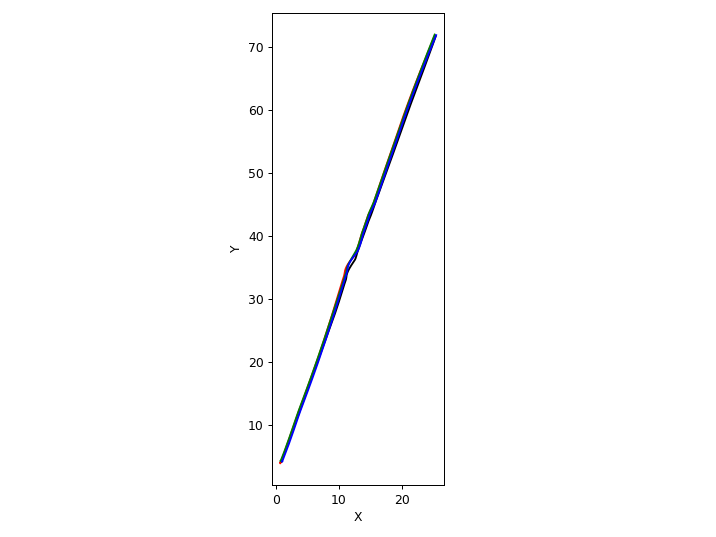

In [6]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
ax.plot(Pose_lidar_arr[0:400,0,3],Pose_lidar_arr[0:400,1,3], color='black')
ax.plot(Prism_corrected_arr[0:400,0,0],Prism_corrected_arr[0:400,1,0], color='red')
ax.plot(Prism_corrected_arr[0:400,0,1],Prism_corrected_arr[0:400,1,1], color='green')
ax.plot(Prism_corrected_arr[0:400,0,2],Prism_corrected_arr[0:400,1,2], color='blue')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
fig.tight_layout() 

<IPython.core.display.Javascript object>


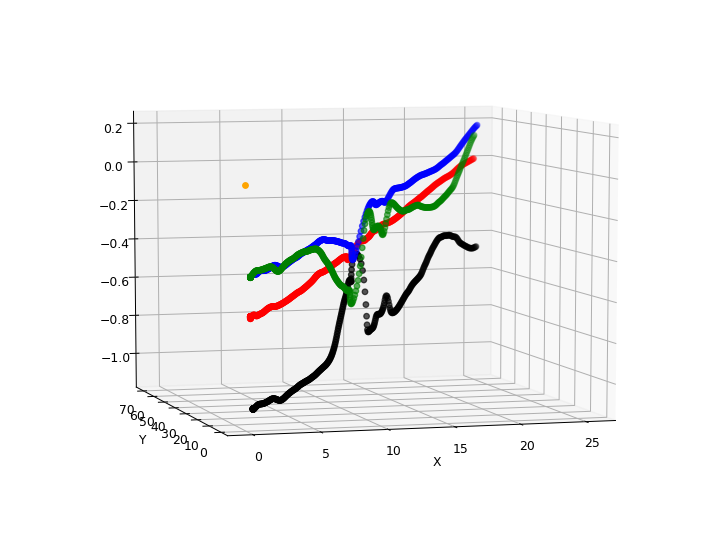

In [7]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(Pose_lidar_arr[0:400,0,3],Pose_lidar_arr[0:400,1,3],Pose_lidar_arr[0:400,2,3], color='black')
ax.scatter3D(Prism_corrected_arr[0:400,0,0],Prism_corrected_arr[0:400,1,0],Prism_corrected_arr[0:400,2,0], color='red')
ax.scatter3D(Prism_corrected_arr[0:400,0,1],Prism_corrected_arr[0:400,1,1],Prism_corrected_arr[0:400,2,1], color='green')
ax.scatter3D(Prism_corrected_arr[0:400,0,2],Prism_corrected_arr[0:400,1,2],Prism_corrected_arr[0:400,2,2], color='blue')
ax.scatter3D(0,0,0, color='orange')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout()

<IPython.core.display.Javascript object>


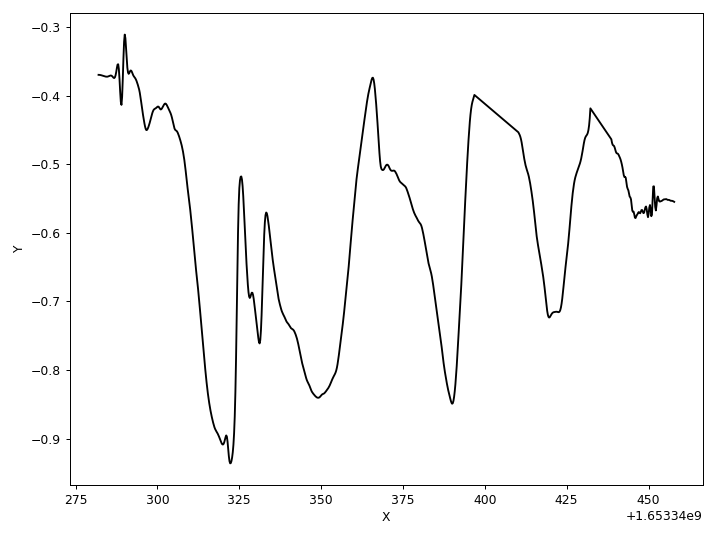

In [8]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
ax.plot(list_lidar_time,Pose_lidar_arr[:,0,2], color='black')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout() 

In [9]:
ttfu = importlib.reload(ttfu)
output = "./data/groundtruth/20220523_other/"
file_name = "marmotte_other.txt"
ttfu.grountruth_GP_convert_for_eval(list_lidar_time, Pose_lidar, output+file_name)

Conversion done !
